<a href="https://colab.research.google.com/github/jmm2000/Ensemble/blob/master/BAGGING_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
dataset=pd.read_csv('australian1.csv')

In [4]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [6]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [7]:
y_pred = bg.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        85
           1       0.76      0.72      0.74        53

    accuracy                           0.80       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.80      0.80       138



In [8]:
bagdt_prob=bg.predict_proba(X_test)

BAGGING DT: ROC AUC=0.912


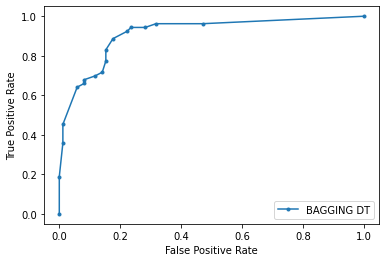

In [9]:
bagdt_prob=bagdt_prob[:,1]

bagdt_auc=roc_auc_score(y_test,bagdt_prob)
print('BAGGING DT: ROC AUC=%.3f' % bagdt_auc)

BAG_fpr,BAG_tpr,_=roc_curve(y_test,bagdt_prob)
plt.plot(BAG_fpr, BAG_tpr, marker='.', label='BAGGING DT')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()